In [1]:
import nltk
import gensim

In [2]:
from nltk.corpus import brown
from gensim.models.doc2vec import TaggedDocument

# convert each category in the Brown corpus to a Tagged Document
documents = [TaggedDocument(brown.words(categories=cat), [idx]) for idx, cat in enumerate(brown.categories())]

In [3]:
from gensim.models.doc2vec import Doc2Vec

# define doc2vec model for the Brown corpus
vec_size = 50
epochs = 100
brown_model = Doc2Vec(documents, vector_size=vec_size, min_count=2, epochs=epochs)

In [4]:
# train for 100 epochs
%time brown_model.train(documents, total_examples=brown_model.corpus_count, epochs=100)

CPU times: user 1min 35s, sys: 15.1 s, total: 1min 50s
Wall time: 1min 18s


In [5]:
# extract Brown corpus document embeddings
doc_vecs = brown_model.docvecs.vectors_docs

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# standardize embeddings
scaler = StandardScaler()
standardized_embeddings = scaler.fit_transform(doc_vecs)

# reduce to 2d with TSNE
tsne_1 = TSNE(random_state=42, perplexity=1)
embeddings_2d_tsne = tsne_1.fit_transform(standardized_embeddings)

# reduce to 2d with PCA
pca_1 = PCA(n_components=2)
embeddings_2d_pca = pca_1.fit_transform(standardized_embeddings)

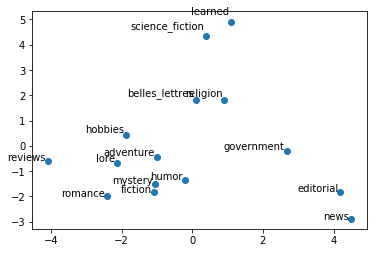

In [7]:
import matplotlib.pyplot as plt

## Plot the PCA reduced embeddings in 2D
plt.scatter(embeddings_2d_pca[:,0], embeddings_2d_pca[:,1])

for label, x, y in zip(brown.categories(), embeddings_2d_pca[:, 0], embeddings_2d_pca[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-2, y),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

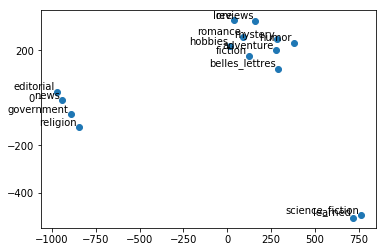

In [8]:
plt.scatter(embeddings_2d_tsne[:,0], embeddings_2d_tsne[:,1])

## Plot the TSNE reduced embeddings in 2D
for label, x, y in zip(brown.categories(), embeddings_2d_tsne[:, 0], embeddings_2d_tsne[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-2,0),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

In [9]:
from nltk.corpus import gutenberg 

# convert each file in the Gutenberg corpus to a Tagged Document
gutenberg_docs = [TaggedDocument(gutenberg.words(fileids=file), [idx]) for idx, file in enumerate(gutenberg.fileids())]

In [10]:
# define doc2vec model for the Gutenberg corpus
gutenberg_model = Doc2Vec(gutenberg_docs, vector_size=vec_size, min_count=2, epochs=epochs)

In [11]:
# train for 100 epochs
gutenberg_model.train(gutenberg_docs, total_examples=gutenberg_model.corpus_count, epochs=100)

In [12]:
# 
gutenberg_doc_vecs = gutenberg_model.docvecs.vectors_docs

In [13]:
scaler = StandardScaler()
standardized_embeddings = scaler.fit_transform(gutenberg_doc_vecs)

tsne_1 = TSNE(random_state=42, perplexity=1)
embeddings_2d_tsne = tsne_1.fit_transform(standardized_embeddings)

pca_1 = PCA(n_components=2)
embeddings_2d_pca = pca_1.fit_transform(standardized_embeddings)

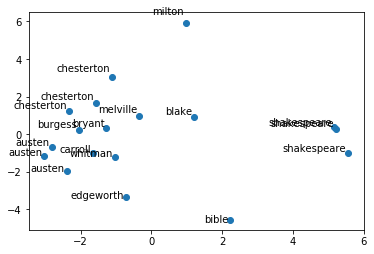

In [14]:
plt.scatter(embeddings_2d_pca[:,0], embeddings_2d_pca[:,1])

for label, x, y in zip([f.split('-')[0] for f in gutenberg.fileids()], embeddings_2d_pca[:, 0], embeddings_2d_pca[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-2, y),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

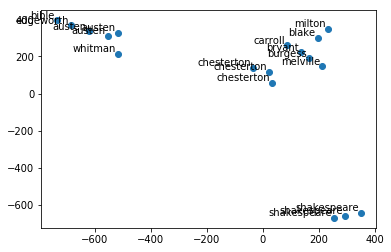

In [15]:
plt.scatter(embeddings_2d_tsne[:,0], embeddings_2d_tsne[:,1])

for label, x, y in zip([f.split('-')[0] for f in gutenberg.fileids()], embeddings_2d_tsne[:, 0], embeddings_2d_tsne[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-2,0),
        textcoords='offset points', ha='right', va='bottom')
plt.show()